# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

## Load Data

First, we are going to load our same prepared data from week 2 where everything has been converted to numbers. Many autoML packages can handle non-numeric data (they usually convert it to numeric with various methods).

In [1]:
!conda create -n msds python=3.10.14 -y
!conda activate msds
!pip install --upgrade pycaret

'conda' is not recognized as an internal or external command,
operable program or batch file.
'conda' is not recognized as an internal or external command,
operable program or batch file.


Defaulting to user installation because normal site-packages is not writeable


In [9]:
!conda info

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!python -V

Python 3.10.14


In [54]:

import pandas as pd # to work with dataset
df = pd.read_csv('./data/new_churn_data.csv')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
0,9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1,1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
2,6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
3,7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
4,6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


# Describe Function
a summary of the key statistics of a dataset, usually including the count, mean, standard deviation, minimum, maximum, and percentiles, providing a quick overview of the data distribution within a column or set of columns 

In [10]:
df.describe()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
count,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000
mean,26.000000,0.600000,0.200000,1.20000,71.16000,1862.416000,130.560545
std,21.771541,0.547723,0.447214,0.83666,31.22738,1393.418843,143.513527
min,8.000000,0.000000,0.000000,0.00000,28.25000,250.900000,8.960714
25%,10.000000,0.000000,0.000000,1.00000,51.15000,811.700000,36.895455
50%,22.000000,1.000000,0.000000,1.00000,77.30000,1701.950000,50.105806
75%,28.000000,1.000000,0.000000,2.00000,97.40000,3106.560000,212.743750
max,62.000000,1.000000,1.000000,2.00000,101.70000,3440.970000,344.097000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         5 non-null      object 
 1   tenure             5 non-null      int64  
 2   PhoneService       5 non-null      int64  
 3   Contract           5 non-null      int64  
 4   PaymentMethod      5 non-null      int64  
 5   MonthlyCharges     5 non-null      float64
 6   TotalCharges       5 non-null      float64
 7   charge_per_tenure  5 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 448.0+ bytes


## Using Filtering We can create a boolean array with a comparison operator, then filter our dataframe like this:

In [11]:
df['tenure'].value_counts()

tenure
22    1
8     1
28    1
62    1
10    1
Name: count, dtype: int64

In [13]:
! pip install pycaret

Defaulting to user installation because normal site-packages is not writeable


# AutoML with pycaret
Our next step is to use pycart for autoML. We will need to install the Python package with conda or pip: `pip install pycaret`. Then we can import the functions we need:

In [19]:
from pycaret.classification import *


In [20]:
automl = setup(df, target='PhoneService')

,Description,Value
0,Session id,7178
1,Target,PhoneService
2,Target type,Binary
3,Original data shape,"(5, 8)"
4,Transformed data shape,"(5, 10)"
5,Transformed train set shape,"(3, 10)"
6,Transformed test set shape,"(2, 10)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


## we simply run the autoML to find the best model:
To make a prediction on a single row from a dataframe

In [30]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:39:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [29]:
best_model

[]


We can now use the model to make predictions. If our data is not being preprocessed, 
we can simply used the best_model object, which is an sklearn model, to make predictions:

In [27]:
df.iloc[-2:-1]

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
3,7832-POPKP,62,1,0,2,101.7,3106.56,50.105806


## Saving and loading our model

In [44]:
save_model(best_model, 'XGBoost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'Contract',
                                              'PaymentMethod', 'MonthlyCharges',
                                              'TotalCharges',
                                              'charge_per_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_impu...
                                                          

'pickle` is a built-in module in the Python standard library which allows for saving and loading of binary data

In [45]:
import pickle
with open('XGBoost.pk', 'wb') as f:
    pickle.dump(best_model, f)

Here, we use the built-in `open` function to open a file with the name `LDA_model.pk`, then open it for writing with `'w'` and in a binary format using `'b'`. We save that file object in the variable `f`. The `with` statement automatically closes the file after we exit the with statement, otherwise, we should call the function `close` from the file object `f`. Then we use pickle to save our data to the file. We could reload it like this:

In [46]:
with open('XGBoost.pk', 'rb') as f:
    loaded_model = pickle.load(f)

In [47]:
loaded_lda = load_model('XGBoost')

Transformation Pipeline and Model Successfully Loaded


In [48]:
new_data=df.iloc[-2:-1]

# Making a Python module to make predictions


In [58]:
from IPython.display import Code

Code('new_churn_data.py')


new_churn_data.py

# Summary

Write a short summary of the process and results here.

A "DS Automation Assignment" likely refers to a project or task focused on automating processes within data science workflows.
This Automate tasks within the data science pipeline, from data collection and cleaning to model deployment and monitoring.
and its Aim to reduce manual intervention, increase efficiency, and ensure reproducibility.

where i did
Data Collection Automation: Use scripts or APIs to gather data from sources like databases, web scraping, or third-party services automatically.
Data Cleaning and Preprocessing: Automate data wrangling processes, such as handling missing values, normalizing data, feature engineering, etc., using tools like Python scripts or frameworks like Pandas.
Model Training and Validation: Implement automated workflows to train machine learning models using various algorithms, with processes to tune hyperparameters automatically ( using AutoML tools).


# Saving our code to GitHub

Creating a repository and uploading the VS Code and Jupyter notebook to GitHub are as below:

www.github.com

a. create a user profile

b. Go to repository profile

c. Click on New and Create the Repositoy Name

d. select public and create a repository and upload the file

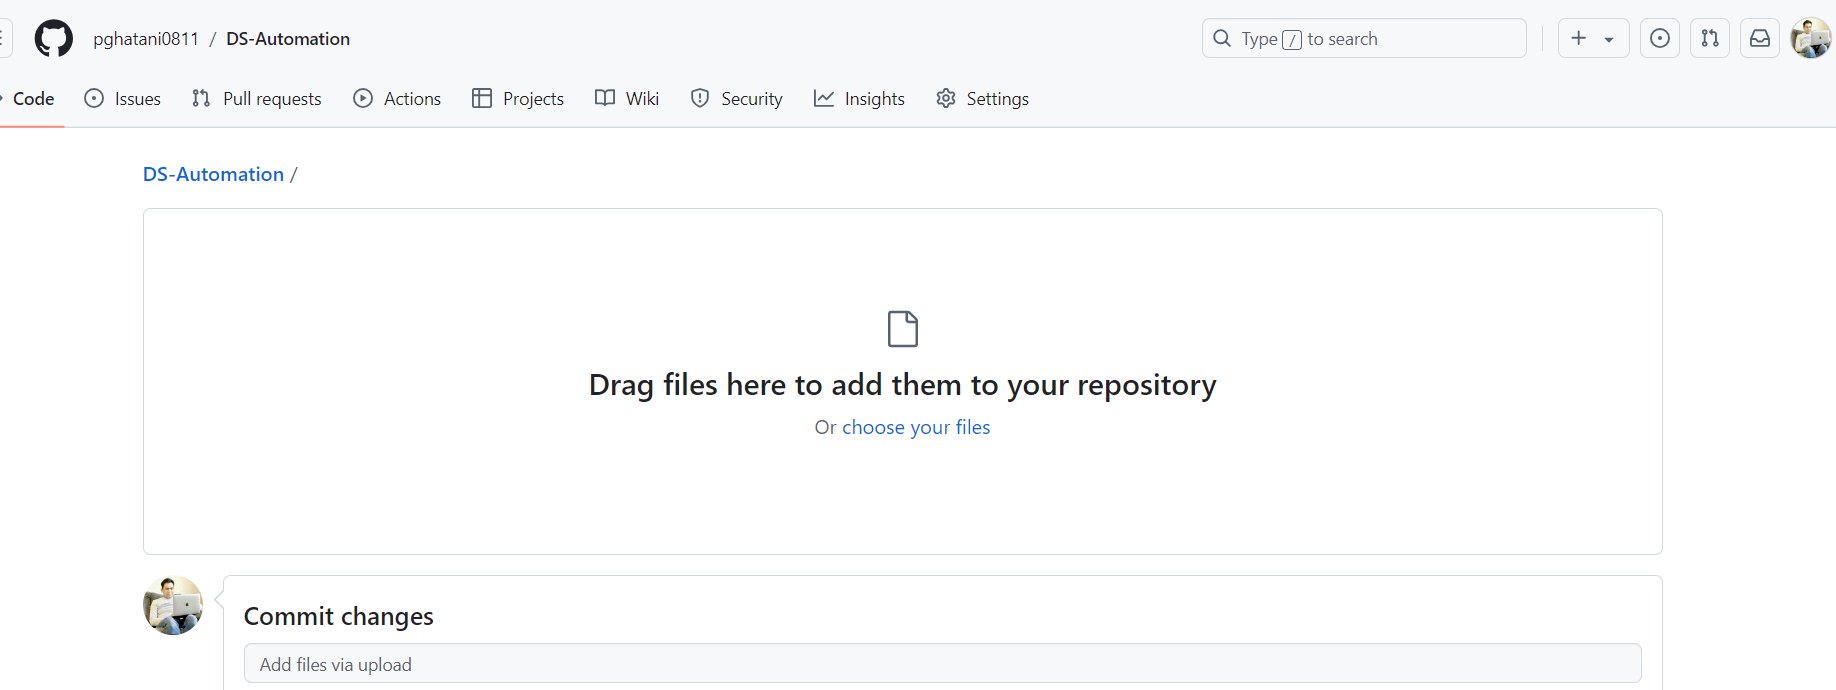